In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lifelines import WeibullAFTFitter, LogLogisticAFTFitter, LogNormalAFTFitter
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('processed_data.csv')
df.head()

,Volume,Mean,Std,Min,Max,Median,SurfaceArea,Elongation,Flatness,Roundness,Time to Event,Event
0,2719,-139.272894,194.164635,-812,154,-56.236328,826.137989,1.436361,1.446431,0.699813,3078,0
1,2150,-105.572558,173.439744,-829,144,-36.021484,1037.374063,1.367921,1.112439,0.781205,70,0
2,1324,-42.965257,172.357348,-815,290,23.177734,755.268235,1.387373,1.089084,0.822009,666,0
3,1547,-74.679379,254.147443,-1024,366,21.595703,912.514223,1.593605,1.631120,0.639694,1172,0
4,16625,-25.891429,107.583454,-783,391,7.496094,2432.305090,1.278080,1.166290,0.735654,1456,1


In [3]:
def f_get_Normalization(X: pd.DataFrame, norm_mode: str) -> pd.DataFrame:
    X_norm = X.copy()  # Tạo một bản sao để tránh thay đổi DataFrame gốc
    
    # Giả sử cột "Time to Event" và "Event" có tên cụ thể trong DataFrame
    cols_exclude = ["Time to Event", "Event"]
    
    # Xác định các cột feature cần chuẩn hóa
    feature_cols = [col for col in X.columns if col not in cols_exclude]

    if norm_mode == 'standard':  # Zero mean unit variance
        for col in feature_cols:
            std = X_norm[col].std()
            if std != 0:
                X_norm[col] = (X_norm[col] - X_norm[col].mean()) / std
            else:
                X_norm[col] = X_norm[col] - X_norm[col].mean()
    
    elif norm_mode == 'normal':  # Min-max normalization
        for col in feature_cols:
            min_val, max_val = X_norm[col].min(), X_norm[col].max()
            if max_val != min_val:
                X_norm[col] = (X_norm[col] - min_val) / (max_val - min_val)
            else:
                X_norm[col] = 0  # Hoặc giữ nguyên
    
    else:
        raise ValueError("INPUT MODE ERROR!")

    return X_norm

In [19]:
df = f_get_Normalization(df, 'standard')

df.head()

,Age,Weight (lbs),Gender,Ethnicity,Smoking status,%GG,Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),...,EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Days between CT and surgery,Time to Event,Event
0,1.110577,-0.649909,-1.726026,0.247976,0.092525,-0.722282,-1.325498,0.313923,0.41176,0.585997,...,-0.651141,-0.536477,-1.583368,-0.564687,-0.564687,-0.300463,-0.618017,-0.209956,3078,0
1,-0.478439,0.586273,-1.726026,-1.304569,1.757970,-0.722282,-1.325498,0.313923,0.41176,0.585997,...,-0.651141,-0.536477,-1.583368,-0.564687,-0.564687,-0.300463,-0.618017,-0.470472,70,0
2,-0.478439,0.043867,0.575342,0.247976,-1.572920,-0.722282,0.749194,0.313923,0.41176,0.585997,...,-1.971766,-1.802914,0.547520,-0.564687,-0.564687,-0.300463,-0.618017,-0.443049,666,0
3,-0.251437,0.043867,0.575342,0.247976,0.092525,-0.722282,0.749194,0.313923,0.41176,-1.694641,...,0.669483,0.729960,0.547520,1.758596,1.758596,3.305089,1.606843,0.434480,1172,0
4,1.678083,-0.675137,0.575342,3.353065,0.092525,-0.722282,0.749194,-3.163375,0.41176,0.585997,...,0.669483,-0.536477,0.547520,-0.564687,-0.564687,-0.300463,1.606843,0.475614,1456,1


In [ ]:
df_features = df.drop(columns=['Time to Event', 'Event'])  # Chỉ lấy feature
df_labels = df[['Time to Event', 'Event']]  # Lấy cột duration và event

df_features_train, df_features_test, df_labels_train, df_labels_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=42)

In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
aft = WeibullAFTFitter()
llf = LogLogisticAFTFitter()
lnf = LogNormalAFTFitter()

aft.fit(df_train, duration_col='Time to Event', event_col='Event')
llf.fit(df_train, duration_col='Time to Event', event_col='Event')
lnf.fit(df_train, duration_col='Time to Event', event_col='Event')


# aft.fit(df, duration_col='Time to Event', event_col='Event')
# llf.fit(df, duration_col='Time to Event', event_col='Event')
# lnf.fit(df, duration_col='Time to Event', event_col='Event')

<lifelines.LogNormalAFTFitter: fitted with 115 total observations, 73 right-censored observations>

In [7]:
aft.print_summary(3)  # access the results using aft.summary
with open("results_AFTWeibull.txt", "w") as f:
    f.write(aft.summary.to_string() + "\n")
    f.write(f"Concordance Index: {aft.concordance_index_}\n")
    f.write(f"Log-likelihood: {aft.log_likelihood_}\n")
    f.write(f"AIC: {aft.AIC_}\n")

<lifelines.WeibullAFTFitter: fitted with 115 total observations, 73 right-censored observations>
             duration col = 'Time to Event'
                event col = 'Event'
   number of observations = 115
number of events observed = 42
           log-likelihood = -377.461
         time fit was run = 2025-05-16 08:36:39 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                     
lambda_ Elongation   0.419     1.521     0.747          -1.045           1.883               0.352               6.576
        Flatness     0.113     1.119     0.887          -1.626           1.851               0.197               6.368
        Max         -0.000     1.000     0.000          -0.001           0.001               0.999               1.001
        Mean        -0.007     0.993     0.006          -0.019           0.004               0.981               1.004
        Median       0.003     1.003     0.004          -0.005           0.010               0.995               1.010
        Min          0.003     1.003     0.004          -0.006           0.011               0.994               1.011
        Roundness    4.062    58.066     2.500          -0.839           8.962               0.432            7802.306
        Std         -0.005     0.995     0.005          -0.014           0.004               0.986               1.004
        SurfaceArea  0.000     1.000     0.000          -0.000           0.000               1.000               1.000
        Volume      -0.000     1.000     0.000          -0.000           0.000               1.000               1.000
        Intercept    7.905  2711.386     5.175          -2.237          18.047               0.107           6.885e+07
rho_    Intercept   -0.191     0.826     0.140          -0.465           0.083               0.628               1.087

                     cmp to      z     p  -log2(p)
param   covariate                                 
lambda_ Elongation    0.000  0.561 0.575     0.799
        Flatness      0.000  0.127 0.899     0.153
        Max           0.000 -0.463 0.643     0.636
        Mean          0.000 -1.262 0.207     2.273
        Median        0.000  0.703 0.482     1.053
        Min           0.000  0.651 0.515     0.957
        Roundness     0.000  1.624 0.104     3.261
        Std           0.000 -1.070 0.285     1.813
        SurfaceArea   0.000  1.549 0.121     3.042
        Volume        0.000 -1.130 0.258     1.952
        Intercept     0.000  1.528 0.127     2.982
rho_    Intercept     0.000 -1.366 0.172     2.539
---
Concordance = 0.646
AIC = 778.923
log-likelihood ratio test = 14.807 on 10 df
-log2(p) of ll-ratio test = 2.844

In [8]:
llf.print_summary(3)  # access the results using llf.summary
with open("results_AFTLlf.txt", "w") as f:
    f.write(llf.summary.to_string() + "\n")
    f.write(f"Concordance Index: {llf.concordance_index_}\n")
    f.write(f"Log-likelihood: {llf.log_likelihood_}\n")
    f.write(f"AIC: {llf.AIC_}\n")

<lifelines.LogLogisticAFTFitter: fitted with 115 total observations, 73 right-censored observations>
             duration col = 'Time to Event'
                event col = 'Event'
   number of observations = 115
number of events observed = 42
           log-likelihood = -378.421
         time fit was run = 2025-05-16 08:36:40 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                     
alpha_ Elongation   0.301     1.352     0.807          -1.281           1.883               0.278               6.576
       Flatness    -0.256     0.774     1.040          -2.295           1.782               0.101               5.945
       Max         -0.000     1.000     0.000          -0.001           0.001               0.999               1.001
       Mean        -0.006     0.994     0.006          -0.018           0.005               0.982               1.005
       Median       0.002     1.002     0.004          -0.006           0.010               0.994               1.010
       Min          0.003     1.003     0.005          -0.006           0.012               0.994               1.012
       Roundness    3.567    35.421     2.667          -1.660           8.795               0.190            6599.123
       Std         -0.004     0.996     0.005          -0.014           0.005               0.986               1.005
       SurfaceArea  0.000     1.000     0.000          -0.000           0.000               1.000               1.000
       Volume      -0.000     1.000     0.000          -0.000           0.000               1.000               1.000
       Intercept    8.221  3719.520     5.522          -2.602          19.044               0.074           1.866e+08
beta_  Intercept   -0.061     0.941     0.137          -0.331           0.208               0.719               1.231

                    cmp to      z     p  -log2(p)
param  covariate                                 
alpha_ Elongation    0.000  0.373 0.709     0.496
       Flatness      0.000 -0.246 0.805     0.312
       Max           0.000 -0.750 0.453     1.141
       Mean          0.000 -1.077 0.281     1.829
       Median        0.000  0.530 0.596     0.747
       Min           0.000  0.573 0.566     0.820
       Roundness     0.000  1.338 0.181     2.466
       Std           0.000 -0.834 0.404     1.307
       SurfaceArea   0.000  1.417 0.156     2.676
       Volume        0.000 -0.971 0.332     1.593
       Intercept     0.000  1.489 0.137     2.873
beta_  Intercept     0.000 -0.445 0.656     0.608
---
Concordance = 0.637
AIC = 780.842
log-likelihood ratio test = 12.831 on 10 df
-log2(p) of ll-ratio test = 2.100

In [9]:
lnf.print_summary(3)  # access the results using lnf.summary
with open("results_AFTLnf.txt", "w") as f:
    f.write(lnf.summary.to_string() + "\n")
    f.write(f"Concordance Index: {lnf.concordance_index_}\n")
    f.write(f"Log-likelihood: {lnf.log_likelihood_}\n")
    f.write(f"AIC: {lnf.AIC_}\n")

<lifelines.LogNormalAFTFitter: fitted with 115 total observations, 73 right-censored observations>
             duration col = 'Time to Event'
                event col = 'Event'
   number of observations = 115
number of events observed = 42
           log-likelihood = -379.831
         time fit was run = 2025-05-16 08:36:40 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                     
mu_    Elongation   0.280     1.322     0.867          -1.420           1.979               0.242               7.239
       Flatness    -1.012     0.363     1.049          -3.068           1.044               0.047               2.841
       Max         -0.000     1.000     0.001          -0.001           0.001               0.999               1.001
       Mean        -0.004     0.996     0.006          -0.016           0.008               0.984               1.008
       Median       0.000     1.000     0.004          -0.008           0.008               0.992               1.008
       Min          0.003     1.003     0.005          -0.007           0.013               0.993               1.013
       Roundness    2.382    10.824     2.927          -3.355           8.118               0.035            3354.768
       Std         -0.005     0.995     0.005          -0.015           0.005               0.985               1.005
       SurfaceArea  0.000     1.000     0.000          -0.000           0.000               1.000               1.000
       Volume      -0.000     1.000     0.000          -0.000           0.000               1.000               1.000
       Intercept   10.715 45019.880     5.947          -0.941          22.370               0.390           5.192e+09
sigma_ Intercept    0.718     2.050     0.121           0.481           0.955               1.617               2.598

                    cmp to      z       p  -log2(p)
param  covariate                                   
mu_    Elongation    0.000  0.322   0.747     0.420
       Flatness      0.000 -0.965   0.335     1.579
       Max           0.000 -0.621   0.535     0.903
       Mean          0.000 -0.673   0.501     0.997
       Median        0.000  0.036   0.971     0.042
       Min           0.000  0.559   0.576     0.795
       Roundness     0.000  0.814   0.416     1.266
       Std           0.000 -0.992   0.321     1.638
       SurfaceArea   0.000  1.277   0.202     2.311
       Volume        0.000 -0.841   0.401     1.320
       Intercept     0.000  1.802   0.072     3.804
sigma_ Intercept     0.000  5.936 <0.0005    28.352
---
Concordance = 0.629
AIC = 783.662
log-likelihood ratio test = 11.780 on 10 df
-log2(p) of ll-ratio test = 1.737

In [16]:
cumulative_hazard = aft.predict_cumulative_hazard(df_test)
survival_function = aft.predict_survival_function(df_test)
median_prediction = aft.predict_median(df_test)
percentile_prediction = aft.predict_percentile(df_test, p=0.9)
expectation_prediction = aft.predict_expectation(df_test)

In [10]:
aft_test_ci = aft.score(df_test, scoring_method="concordance_index")
print(aft_test_ci)
with open("results_AFTWeibull.txt", "a") as f:
    f.write(f"Concordance Index on Test: {aft_test_ci}\n")
    
llf_test_ci = llf.score(df_test, scoring_method="concordance_index")
print(llf_test_ci)
with open("results_AFTLlf.txt", "a") as f:
    f.write(f"Concordance Index on Test: {llf_test_ci}\n")
    
lnf_test_ci = lnf.score(df_test, scoring_method="concordance_index")
print(lnf_test_ci)
with open("results_AFTLnf.txt", "a") as f:
    f.write(f"Concordance Index on Test: {lnf_test_ci}\n")

0.5351351351351351
0.5567567567567567
0.518918918918919


In [17]:
with open("results_AFTWeibull.txt", "a") as f:
    f.write("\n===== Predictions from AFT Model =====\n")
    
    f.write("Cumulative Hazard:\n")
    f.write(cumulative_hazard.to_string() + "\n\n")
    
    f.write("Survival Function:\n")
    f.write(survival_function.to_string() + "\n\n")
    
    f.write("Median Prediction:\n")
    f.write(median_prediction.to_string() + "\n\n")
    
    f.write("90th Percentile Prediction:\n")
    f.write(percentile_prediction.to_string() + "\n\n")
    
    f.write("Expectation Prediction:\n")
    f.write(expectation_prediction.to_string() + "\n\n")

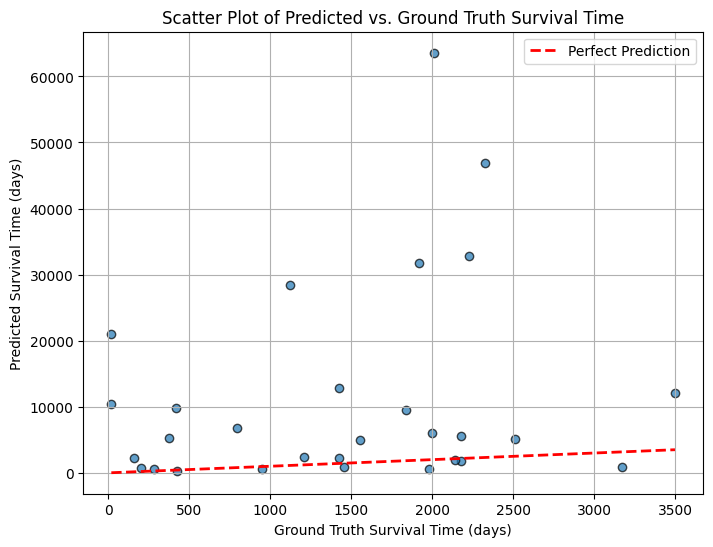

In [21]:
# Giả sử bạn có dữ liệu ground truth và predicted survival time
# Thay thế bằng dữ liệu thực tế của bạn
ground_truth = np.array(df_test['Time to Event'])
predicted = np.array(expectation_prediction)

plt.figure(figsize=(8, 6))
plt.scatter(ground_truth, predicted, alpha=0.7, edgecolors='k')
plt.plot([ground_truth.min(), ground_truth.max()], [ground_truth.min(), ground_truth.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Ground Truth Survival Time (days)")
plt.ylabel("Predicted Survival Time (days)")
plt.title("Scatter Plot of Predicted vs. Ground Truth Survival Time")
plt.legend()
plt.grid(True)
plt.show()